In [1]:
import os

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ruta_actual = os.getcwd()

ruta_actual

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones\\notebooks'

In [4]:
ruta_del_proyecto = os.path.dirname(
    ruta_actual
    )

ruta_del_proyecto

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones'

In [5]:
ruta_del_dataset = os.path.join(
    ruta_del_proyecto, 
    'data', 
    'Internet.xlsx'
    )

ruta_del_dataset

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones\\data\\Internet.xlsx'

In [33]:
accesos_por_tecnologia = pd.read_excel(
    ruta_del_dataset, 
    sheet_name='Accesos Por Tecnología'
    )

In [34]:
accesos_por_tecnologia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0
...,...,...,...,...,...,...,...,...,...
1004,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
1005,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
1006,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
accesos_por_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           1008 non-null   object 
 1   Trimestre     1008 non-null   object 
 2   Provincia     1007 non-null   object 
 3   ADSL          1007 non-null   float64
 4   Cablemodem    1007 non-null   float64
 5   Fibra óptica  1007 non-null   float64
 6   Wireless      1007 non-null   float64
 7   Otros         1007 non-null   float64
 8   Total         1007 non-null   float64
dtypes: float64(6), object(3)
memory usage: 71.1+ KB


In [15]:
accesos_por_tecnologia[
    accesos_por_tecnologia.isna().any(axis=1)
    ]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
accesos_por_tecnologia['Trimestre'].iloc[1008]

'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'

In [17]:
accesos_por_tecnologia.dropna(inplace=True)

accesos_por_tecnologia.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [27]:
años = accesos_por_tecnologia.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].mean().reset_index()

años

,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,155049.479167,103907.156250,6300.645833,3179.520833,2986.458333,271423.260417
1,2015,157455.145833,116280.947917,6467.468750,3452.406250,2529.645833,286185.614583
2,2016,157018.895833,126844.666667,7084.656250,3514.541667,2371.177083,296833.937500
3,2017,152492.729167,147375.656250,7982.416667,4508.791667,3585.020833,315944.614583
4,2018,145645.666667,172617.416667,11240.875000,9062.989583,4851.666667,343418.614583
5,2019,100607.291667,203494.541667,39220.625000,14172.666667,8887.416667,366382.541667
6,2020,94508.625000,213957.958333,48298.125000,16289.718750,9979.354167,383033.781250
7,2021,81271.291667,238302.187500,67432.354167,20073.312500,10487.427083,417566.572917
8,2022,59502.322917,251271.531250,113280.562500,23251.416667,9797.656250,457103.489583
9,2023,41095.947917,250428.072917,149211.458333,24225.687500,8459.260417,473420.427083


In [28]:
años.drop(index=11, inplace=True)

In [29]:
años

,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,155049.479167,103907.156250,6300.645833,3179.520833,2986.458333,271423.260417
1,2015,157455.145833,116280.947917,6467.468750,3452.406250,2529.645833,286185.614583
2,2016,157018.895833,126844.666667,7084.656250,3514.541667,2371.177083,296833.937500
3,2017,152492.729167,147375.656250,7982.416667,4508.791667,3585.020833,315944.614583
4,2018,145645.666667,172617.416667,11240.875000,9062.989583,4851.666667,343418.614583
5,2019,100607.291667,203494.541667,39220.625000,14172.666667,8887.416667,366382.541667
6,2020,94508.625000,213957.958333,48298.125000,16289.718750,9979.354167,383033.781250
7,2021,81271.291667,238302.187500,67432.354167,20073.312500,10487.427083,417566.572917
8,2022,59502.322917,251271.531250,113280.562500,23251.416667,9797.656250,457103.489583
9,2023,41095.947917,250428.072917,149211.458333,24225.687500,8459.260417,473420.427083


In [30]:
df_melted = pd.melt(
    años, 
    id_vars='Año', 
    value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total'], 
    var_name='Tecnologia', 
    value_name='Accesos'
    )


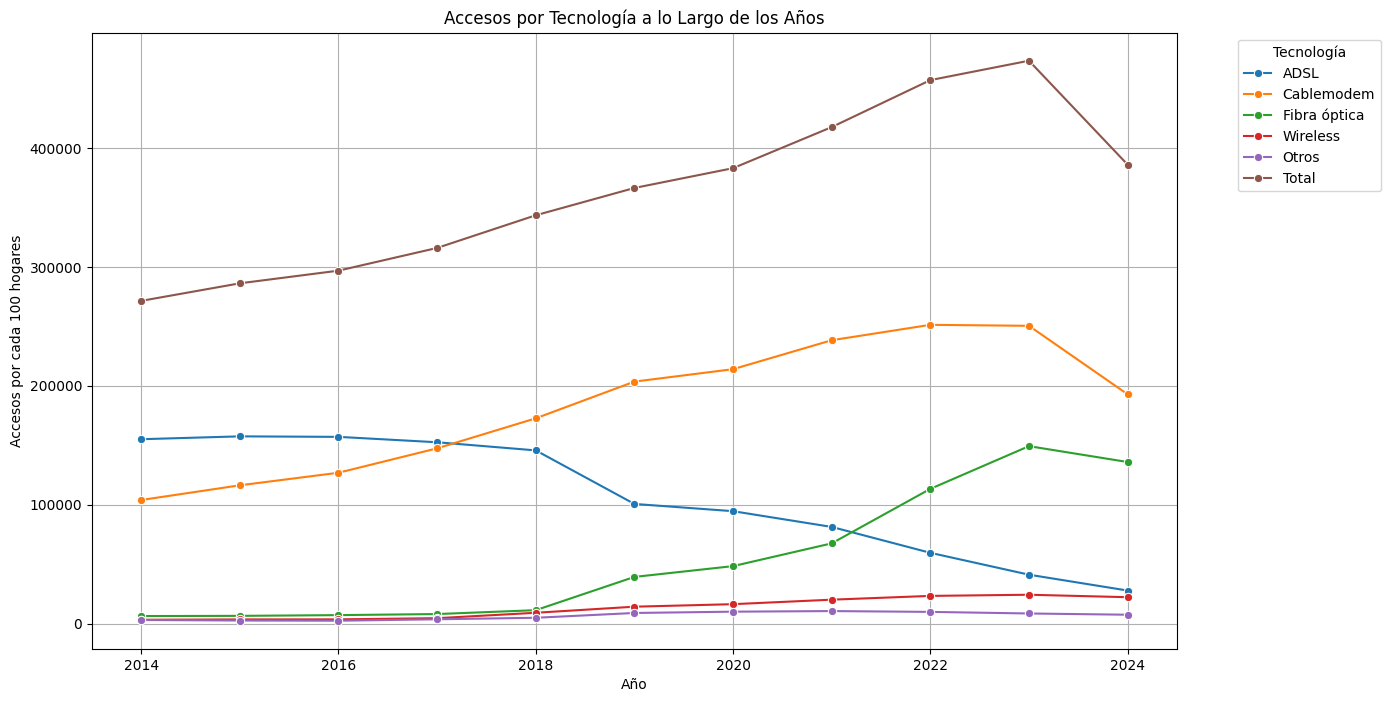

In [31]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted, x='Año', y='Accesos', hue='Tecnologia', marker='o')
plt.title('Accesos por Tecnología a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()